**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Importing the dataset into Panda's DataFrame
wine_quality_dataset = pd.read_csv("/content/winequality-red.csv")

In [3]:
#Number of Rows and Columns
wine_quality_dataset.shape

(1599, 12)

In [4]:
#Retrieve first five data from Dataset
wine_quality_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Checking if there are any missing values in the dataset
wine_quality_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


 **Data Analysis and Visualization**

In [7]:
#Statistical measures of the dataset
wine_quality_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
wine_quality_dataset.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [10]:
wine_quality_dataset['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


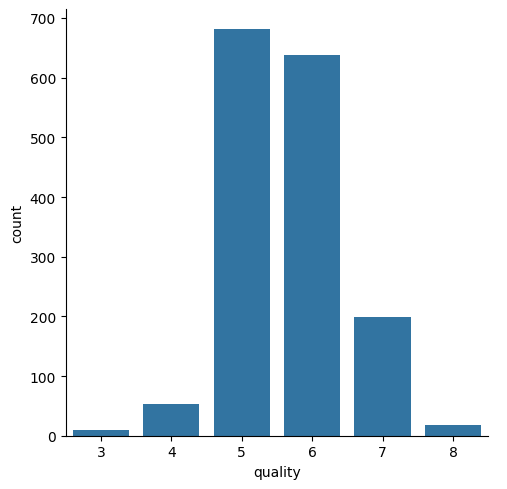

In [11]:
#number of values for each quality
sns.catplot(x = 'quality', data = wine_quality_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='citric acid'>

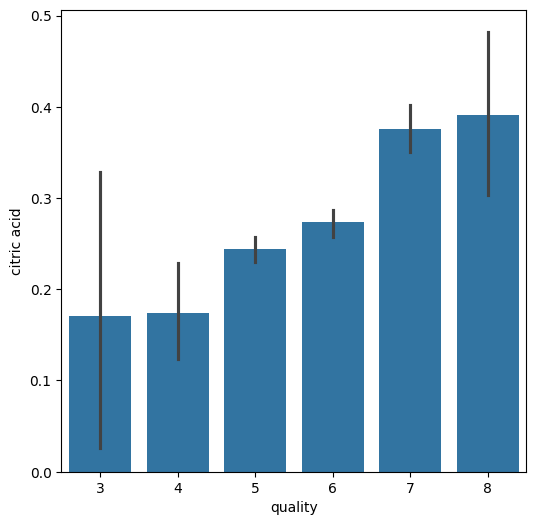

In [14]:
#Citric acid vs Quality
plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_quality_dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

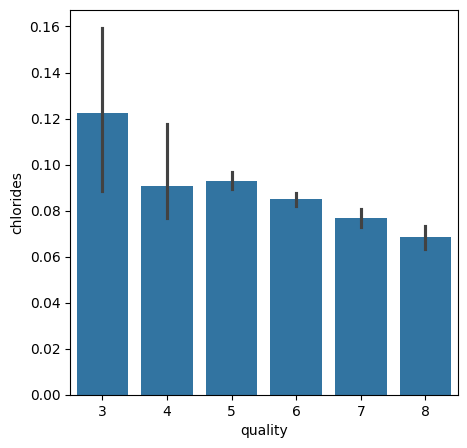

In [16]:
#chlorides vs quality
plot = plt.figure(figsize =(5,5))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_quality_dataset)

 **Correlation**

1.Positive Correlation

2.Negative Correlation

In [25]:
correlation = wine_quality_dataset.corr()

<Axes: >

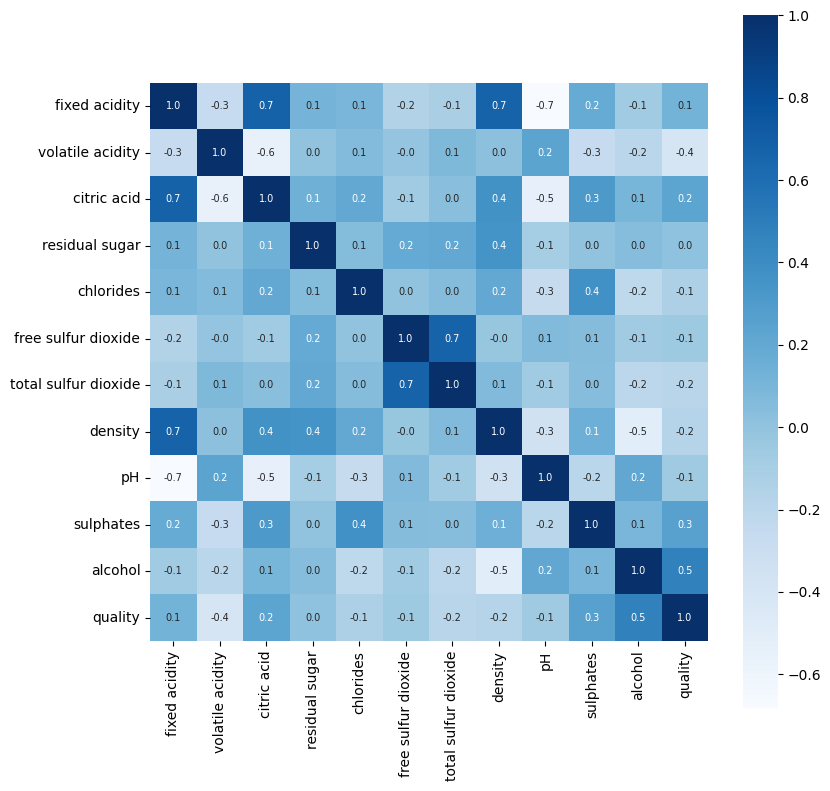

In [27]:
#Constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(9,9))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 7}, cmap = 'Blues')

**Data Preprocessing**

In [30]:
#Separting the data and label
X = wine_quality_dataset.drop(columns = 'quality', axis = 1)

In [31]:
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

Label Binarization

In [32]:
Y = wine_quality_dataset['quality'].apply(lambda y_value : 1 if y_value >= 7 else 0)

In [33]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [35]:
Y.value_counts()

,count
quality,
0,1382
1,217


**Train Test Split**

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


**Model Training**

Random Forest classifier

In [38]:
model = RandomForestClassifier()

In [39]:
model.fit(X_train, Y_train)

RandomForestClassifier()

**Model Evaluation**

Accuracy Score

In [40]:
#Accuracy on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [43]:
print("Accuracy of the Training data :", training_data_accuracy * 100)

Accuracy of the Training data : 100.0


In [42]:
#Accuracy on the testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [44]:
print("Accuracy of the Testing data :", testing_data_accuracy * 100)

Accuracy of the Testing data : 91.875


**Building a Predictive System**

In [50]:
input_data = (8.0,0.59,0.16,1.8,0.065,3.0,16.0,0.9962,3.42,0.92,10.5)

#changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as i am predicitng the label for only one instance
reshaped_data = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(reshaped_data)
print(prediction)

if (prediction[0] == 1):
  print("Good Quality Wine")
else:
  print("Bad Quality Wine")

[1]
Good Quality Wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
